In [1]:
# from google.colab import auth
# auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import ee, folium

In [4]:
# import ee
# ee.Authenticate()
# ee.Initialize()

# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

## 2.import necessary python-packets

In [5]:
try:
    import geopandas as gpd
    import shapefile
    from osgeo import ogr,osr,gdal
except:
    !pip install geopandas
    !pip install PyShp
    !pip install gdal
import geopandas as gpd
import shapefile
import numpy as np
import os
import time
from osgeo import ogr,osr,gdal
import tensorflow as tf

## 3.Compute NDUI

In [6]:
F101992 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992').select('stable_lights')
F101993 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101993').select('stable_lights')
F101994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101994').select('stable_lights')
F121994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121994').select('stable_lights')
F121995 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121995').select('stable_lights')
F121996 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121996').select('stable_lights')
F121997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121997').select('stable_lights')
F121998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121998').select('stable_lights')
F121999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121999').select('stable_lights')
F141997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141997').select('stable_lights')
F141998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141998').select('stable_lights')
F141999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141999').select('stable_lights')
F142000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142000').select('stable_lights')
F142001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142001').select('stable_lights')
F142002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142002').select('stable_lights')
F142003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142003').select('stable_lights')
F152000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152000').select('stable_lights')
F152001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152001').select('stable_lights')
F152002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152002').select('stable_lights')
F152003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152003').select('stable_lights')
F152004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152004').select('stable_lights')
F152005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152005').select('stable_lights')
F152006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152006').select('stable_lights')
F152007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152007').select('stable_lights')
F162004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162004').select('stable_lights')
F162005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162005').select('stable_lights')
F162006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162006').select('stable_lights')
F162007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162007').select('stable_lights')
F162008 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162008').select('stable_lights')
F162009 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162009').select('stable_lights')
F182010 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182010').select('stable_lights')
F182011 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182011').select('stable_lights')
F182012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012').select('stable_lights')

collections = [F101992, F101993, F101994, F121994, F121995, F121996, F121997, F121998, F121999, F141997, F141998,
                    F141999, F142000, F142001,F142002, F142003, F152000, F152001, F152002, F152003, F152004, F152005,
                    F152006, F152007,F162004, F162005, F162006, F162007, F162008, F162009, F182010, F182011, F182012]

c = [-3.06516, -2.0638, -1.68421, -1.71621, 0.530922, 0.303469, -0.18513, 0.490138, 1.800988, -0.6186,
         -0.91352, -1.37993, 0.061872, 0.249452, 1.127103, 0.866522,0, 0.005164,-0.04462, -0.27189, -0.06977, 0.449229,
         0.913485, 0.644785, -0.02563, -0.54115, -0.38377, 0.629564, 0.745403, -0.15161, 6.22332, 1.427157, 3.866698]

b = [-0.00698, -0.00726, -0.00695, -0.00454, 0.00011, -0.00176, -0.00057, 0.001236, 0.002969, -0.0094,
     -0.00929, -0.00889, -0.00469, -0.00452, -0.00221, -0.00351, 0, 8.94e-05, 0.000117, -0.0085, -0.00912, -0.00601,
     -0.00595, -0.00675, -0.00496, -0.0094, -0.0061, -0.00084, -0.00062, -0.00278, 0.014627,0.002877, 0.007962]

a = [1.519907, 1.516595, 1.491333, 1.331971, 0.984465, 1.111207, 1.034429, 0.905787, 0.761106, 1.603921,
      1.603648, 1.586457, 1.294471, 1.275902, 1.128708, 1.206319, 1, 1.002879, 0.987943, 1.555808, 1.591033, 1.401146,
      1.381139,1.448976, 1.317581, 1.613536, 1.41435, 1.040815, 1.037042, 1.193437, -0.08536, 0.774923, 0.355542]

images = [0 for _ in range(33)]
count = 0
total_list = []
images_correct = [0 for _ in range(33)]

def fun3(raw,correct):
    out = correct.where(raw.lt(5.0),raw.float())
    return out

for i in range(33):
    images[i] = ee.Image(a[i]).multiply(collections[i].float()).add(ee.Image(b[i]).multiply(collections[i].float().pow(2))).add(ee.Image(c[i]))
    images_correct[i] = fun3(collections[i],images[i]).select('constant')

In [7]:
China_city = ee.FeatureCollection('users/keithw0777/city_CN')
L7 = ee.ImageCollection('LE7_L1T_TOA').filterDate('2010-01-01', '2012-12-31')
OUTPUT_BUCKET='ndui_city' # define the storage bucket name
def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    #var mask = img.select('10','20','30','40','50','70').mask().reduce('product').eq(1);
    masked = img.mask(mask);
    ndvi = masked.normalizedDifference(["B4","B3"])
    return ndvi

NDVIs = L7.map(fun4)

Mean_NDVI = NDVIs.median()
Max_NDVI = NDVIs.max()
Min_NDVI = NDVIs.min()
mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

F182012 = images_correct[32]
normalizeF182012 = F182012.toFloat().divide(63.0)
diff = normalizeF182012.add(mosaic.multiply(-1.0))
sum = normalizeF182012.add(mosaic)

In [8]:
ndui = diff.divide(sum)

In [9]:
visualization = {
  'min': 0.0,
  'max': 1.0,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
  #'bands': ['B4', 'B3', 'B2'],
}

map = folium.Map(location=[1.64, 110.20],zoom_start=4, height=1000,width=1500)
mapid = ndui.getMapId(visualization)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Normalized Difference Urban Index',
    opacity=0.5,
  ).add_to(map)

map.add_child(folium.LayerControl())
title_html = '''
             <h3 align="center" style="font-size:10px"><b>'NDUI'</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

EEException: ImageCollection.load: ImageCollection asset 'LANDSAT/LE7_L1T' not found at version 1508450547624326 (does not exist or caller does not have access).

In [ ]:
lat = 30.2672
lon = 360 - 97.7431


p = ee.Geometry.Point([lon, lat])

data_b1 = ndui.reduceRegion(ee.Reducer.mean(),p,30).getInfo()

In [ ]:
data_b1

{'constant': 0.889458586340854}

In [ ]:
# China_city

In [ ]:
# def filter_city_ndui(city):
#     """
#     city:Guangzhou City
#     """
#     city_shape = China_city.filter(ee.Filter.eq('city',city))
#     ndui = diff.divide(sum).clip(city_shape)
#     mask1 = Mean_NDVI.gt(0.0)
#     mask2 = ndui.gt(0.0)
#     ndui_mask = ndui.updateMask(mask1.And(mask2))
#     # binary
#     bin_mask = mask1.bitwiseAnd(mask2).clip(city_shape)
#     return city_shape,ndui_mask,bin_mask

In [ ]:
# def export_task(image_mask,city_shape,file_name):
#     task = ee.batch.Export.image.toDrive(
#     image=image_mask,
#     description='Training Export',
#     fileNamePrefix=file_name,
#     #bucket=OUTPUT_BUCKET,
#     scale=30,
#     region=city_shape.geometry())
#     return task

In [ ]:
# def found_file(file_name,OUTPUT_BUCKET='ndui_city'):
#     #FILE_PATH = 'gs://' + OUTPUT_BUCKET + '/' + file_name+'.tif'
#     FILE_PATH = 'drive/MyDrive/' + file_name+'.tif'
#     print(FILE_PATH)
#     print('Found training file.' if tf.io.gfile.exists(FILE_PATH)
#         else 'No training file found.')

In [ ]:
# !ls drive/MyDrive/ndui/Guangzhou_studyarea.shp

In [ ]:
# city = gpd.read_file('drive/MyDrive/ndui/Guangzhou_studyarea.shp')

In [ ]:
# print(city.crs)                      #{'init': 'epsg:3857'}
# city.plot()

In [ ]:
# city = city.to_crs(epsg='32650')


In [ ]:
# city = city.to_crs({'init':'epsg:32650'}, inplace = True)

In [ ]:
# city.to_crs(epsg = "25833", inplace = True)

In [ ]:

    # city = city.to_crs({'init':'epsg:32650'})
    # city['area(/km)'] = city.apply(lambda row:row.geometry.area/1e6,axis=1)
    # city1 = filter_small_area(city)
    # city1.to_file(os.path.join(drive_file,export_file_name+'_urban_Area_big20_To_shape.shp'),driver='ESRI Shapefile',encoding='utf-8')
    # CITY = gpd.read_file(os.path.join(drive_file,export_file_name+'_urban_Area_big20_To_shape.shp'))
    # task = ee.batch.Export.image.toCloudStorage(
    #             image=F182012.clip(CITY),
    #             description='Training Export',
    #             fileNamePrefix=file_name,
    #             bucket=OUTPUT_BUCKET,
    #             scale=30,
    #             region=CITY.geometry())
    # CITY.plot(figsize=(12,6))

## 4.Raster to Vector

In [ ]:
# #raster to vector
# def raster_to_shape(rasterfile,shapefile):
#     data = gdal.Open(rasterfile, gdal.GA_ReadOnly)
#     inband = data.GetRasterBand(1)
#     drv = ogr.GetDriverByName('ESRI Shapefile')
#     Polygon = drv.CreateDataSource(shapefile)
#     prj = osr.SpatialReference()
#     prj.ImportFromWkt(data.GetProjection())
#     Polygon_layer = Polygon.CreateLayer(shapefile, srs=prj, geom_type = ogr.wkbMultiPolygon)
#     newField = ogr.FieldDefn('Value', ogr.OFTInteger)
#     Polygon_layer.CreateField(newField)
#     gdal.FPolygonize(inband, None, Polygon_layer, 0)

In [ ]:
# def filter_small_area(shape):
#     for i in range(len(shape)):
#         if shape.loc[i]['Value'] == 0:
#             shape.drop([i],axis=0,inplace=True)
#     shape = shape.sort_values(by='area(/km)',ascending=False)
#     shape.drop(shape.index[10:],inplace=True)
#     return shape

In [ ]:
# def uploadToGCP(city_cn,city_name,export_file_name):
#     """
#     city_CN:'Guangzhou City'
#     city_name:'Guangzhou'
#     export_file_name:'Guangzhou_city'
#     """
#     city_shape,city_ndui,city_mask = filter_city_ndui(city_cn)#'Shenzhen'
#     task = export_task(city_mask,city_shape,export_file_name)#'shenzhen_city'
#     task.start()
#     print(ee.batch.Task.list())
#     while task.active():
#         print('Polling for task (id: {}).'.format(task.id))
#         time.sleep(30)
#     print('Done with image export.')
#     if ee.batch.Task.list()[0].status()['state'] == 'FAILED':
#         print('Upload File Failed,due to '+ee.batch.Task.list()[0].status()['error_message'])
#     found_file(export_file_name)
#     drive_file = os.path.join('/content/drive/MyDrive/',city_name)
#     if not os.path.exists(drive_file):
#         os.mkdir(drive_file)
#     #gcp_path = 'gs://nduicity_luo/'+export_file_name+'.tif'
#     gcp_path = 'drive/MyDrive/'+export_file_name+'.tif'
#     print('gcp_path:',gcp_path)
#     print('drive_file:',drive_file)

In [ ]:
# city_shape,city_ndui,city_mask = filter_city_ndui('Guangzhou City')

In [ ]:
# task = export_task(city_mask,city_shape,'Guangzhou_city')

In [ ]:
# task.start()

In [ ]:
# uploadToGCP('Guangzhou City','Guangzhou','Guanghzou_city')

## 5.Get the built-up areas shapefile

In [ ]:
# def main(city_name,export_file_name):
#     """
#     city_name:'Guangzhou'
#     export_file_name:'guangzhou_city'
#     """
#     raster_to_shape(os.path.join(drive_file,export_file_name+'.tif'),os.path.join(drive_file,export_file_name+'_urban_shape.shp'))
#     city = gpd.read_file(os.path.join(drive_file,export_file_name+'_urban_shape.shp'))
#     city = city.to_crs({'init':'epsg:32650'})
#     city['area(/km)'] = city.apply(lambda row:row.geometry.area/1e6,axis=1)
#     city1 = filter_small_area(city)
#     city1.to_file(os.path.join(drive_file,export_file_name+'_urban_Area_big20_To_shape.shp'),driver='ESRI Shapefile',encoding='utf-8')
#     CITY = gpd.read_file(os.path.join(drive_file,export_file_name+'_urban_Area_big20_To_shape.shp'))
#     task = ee.batch.Export.image.toCloudStorage(
#                 image=F182012.clip(CITY),
#                 description='Training Export',
#                 fileNamePrefix=file_name,
#                 bucket=OUTPUT_BUCKET,
#                 scale=30,
#                 region=CITY.geometry())
#     CITY.plot(figsize=(12,6))

In [ ]:
#uploadToGCP('Guangzhou City','Guangzhou','Guanghzou_city')

In [ ]:
#!gsutil cp gcp_path drive_file
#!gsutil cp gs://ndui_city/Guanghzou_city.tif /content/drive/MyDrive/GuangZhouCity

In [ ]:
#main('Guanghzou','Guanghzou_city')

# Gridded Data Generation

In [ ]:
# Extracting the data at 10 km2 grid
# 10 km2 grid is approximately 3.16 km by 3.16 km
# 1 km2 is 1 km by 1 km
# Hence the data has to be averaged for 3160 m pixel sizes
# Megacities from https://arxiv.org/pdf/2101.03523.pdf
# Megacities: https://rb.gy/t7jzr8

In [ ]:
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat().addBands(ndui)

In [ ]:
latlon

In [ ]:
area = ee.Geometry.Polygon([[[360 - 74.006,40.7128],[360 - 74.006+dx,40.7128],[360 - 74.006+dx,40.7128+dy],[360 - 74.006,40.7128+dy],[360 - 74.006,40.7128]]])

In [ ]:
# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=area,
  maxPixels=1e8,
  scale=10);

In [ ]:
# get data into three different arrays
data = np.array((ee.Array(latlon.get('ndui')).getInfo()))
lats = np.array((ee.Array(latlon.get('latitude')).getInfo()))
lons = np.array((ee.Array(latlon.get('longitude')).getInfo()))

EEException: ignored

In [ ]:
# New York City		40.7128	-74.006

lat = 40.7128
lon = 360 - 74.006
area = 783 # km2
sqrt_area = np.sqrt(area)
side_box_deg = sqrt_area/110

dx, dy = 0.01, 0.01

start_lat = lat - side_box_deg#/2
end_lat   = lat + side_box_deg#/2

start_lon = lon - side_box_deg#/2
end_lon   = lon + side_box_deg#/2

lats = np.arange(start_lat, end_lat, dy)
lons = np.arange(start_lon, end_lon, dx)

ndui_gridded = np.zeros((1, lats.shape[0], lons.shape[0]))

for i_lat, lat in enumerate(lats):
    for i_lon, lon in enumerate(lons):
        p = ee.Geometry.Point([lon, lat])
        data_b1 = ndui.reduceRegion(ee.Reducer.mean(),p,1000).getInfo()
        ndui_gridded[0, i_lat, i_lon] = data_b1['constant']
        #print(i_lat, i_lon)
        print(data_b1)


import xarray as xr
import pandas as pd

times = pd.date_range("2000-01-01", periods=1)

ds = xr.Dataset({
    'ndui': xr.DataArray(
                data   = ndui_gridded,   # enter data here
                dims   = ['time', 'lat', 'lon'],
                coords = {'time': times, 'lat': lats, 'lon':lons},
                )
            },
    )

{'constant': 0.11181088061279097}
{'constant': 1.9511718722711298}
{'constant': 3.193196887259107}
{'constant': 3.299710343140614}
{'constant': 4.31946595470954}
{'constant': 4.375115017005653}
{'constant': 4.640813971998438}
{'constant': 4.640813971998438}
{'constant': 3.9298208936140626}
{'constant': 4.858397987602547}
{'constant': 4.1426247916183865}
{'constant': 4.088944468765664}
{'constant': 3.5740753036295954}
{'constant': 3.288013497970924}
{'constant': 3.4993741695637723}
{'constant': 6.521997226124659}
{'constant': -26.79909500014623}
{'constant': -16.440014366254896}
{'constant': -7.30573034272261}
{'constant': -6.221493093344233}
{'constant': -9.521267181264232}
{'constant': -6.35189216779841}
{'constant': -3.7486025762828956}
{'constant': -3.2422871079284232}
{'constant': -3.093147104284611}
{'constant': -2.8878962022537418}
{'constant': -0.5983612765994243}
{'constant': 0.3899475255218877}
{'constant': -2.320057359244209}
{'constant': -1.9869463506434306}
{'constant': -1.

In [ ]:
!ls /content/drive/MyDrive/ndui
ds.to_netcdf('/content/drive/MyDrive/ndui/ndui_new_york.nc')

Guangzhou_studyarea.shp  Guangzhou_studyarea.shx


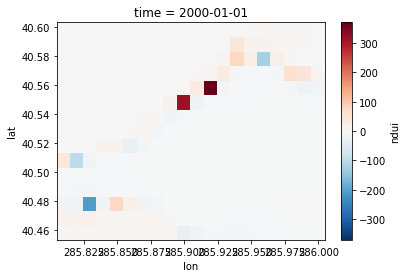

In [ ]:
ds.ndui.sel(lat=slice(40.4,40.6)).sel(lon=slice(285.8,286)).plot()

In [ ]:
pd.date_range(start='2001-01-01', end='2012-12-31', periods=12)

DatetimeIndex([          '2001-01-01 00:00:00',
               '2002-02-03 08:43:38.181818180',
               '2003-03-08 17:27:16.363636360',
               '2004-04-10 02:10:54.545454544',
               '2005-05-13 10:54:32.727272720',
               '2006-06-15 19:38:10.909090912',
               '2007-07-19 04:21:49.090909088',
               '2008-08-20 13:05:27.272727264',
               '2009-09-22 21:49:05.454545440',
               '2010-10-26 06:32:43.636363648',
               '2011-11-28 15:16:21.818181824',
                         '2012-12-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
data_b1['constant']

0.06296541317403041

In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 31.4 MB/s 
     |████████████████████████████████| 1.2 MB 70.3 MB/s 
     |████████████████████████████████| 8.8 MB 59.1 MB/s 
     |████████████████████████████████| 99 kB 13.2 MB/s 
     |████████████████████████████████| 98 kB 11.0 MB/s 
     |████████████████████████████████| 130 kB 78.5 MB/s 
     |████████████████████████████████| 198 kB 77.5 MB/s 
     |████████████████████████████████| 1.3 MB 67.4 MB/s 
     |████████████████████████████████| 3.4 MB 86.6 MB/s 
     |████████████████████████████████| 3.0 MB 62.6 MB/s 
     |████████████████████████████████| 128 kB 49.1 MB/s 
     |████████████████████████████████| 1.6 MB 83.9 MB/s 
     |████████████████████████████████| 423 kB 79.6 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 9.7 MB 63.7 MB/s 
     |█████████████████████████████

In [ ]:
import geemap
import geemap.colormaps as cm

In [ ]:
#ds.to_netcdf('new_york_ndui.nc')

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, lat: 51, lon: 51)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * lat      (lat) float64 40.46 40.47 40.48 40.49 ... 40.93 40.94 40.95 40.96
  * lon      (lon) float64 285.7 285.7 285.8 285.8 ... 286.2 286.2 286.2 286.2
Data variables:
    ndui     (time, lat, lon) float64 0.1118 1.951 3.193 ... 0.1681 0.06297

In [ ]:
img = geemap.netcdf_to_ee(nc_file='/content/drive/MyDrive/ndui/ndui_new_york.nc', var_names='ndui')
palette = cm.palettes.YlOrRd

Map = geemap.Map()
Map.addLayer(img, {'min': -1, 'max': 1, 'palette': palette, 'opacity': 0.6}, "u_wind")
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# img
lat = 40.46
lon = 285.7


p = ee.Geometry.Point([lon, lat])

data_b1 = img.reduceRegion(ee.Reducer.mean(),p,30).getInfo()
print(data_b1)

{'ndui': None}


In [ ]:
visualization = {
  'min': -1.0,
  'max': 1.0,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
  #'bands': ['B4', 'B3', 'B2'],
}

map = folium.Map(location=[40.4, 285],zoom_start=4, height=1000,width=1500)
mapid = img.getMapId(visualization)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Normalized Difference Urban Index',
    opacity=0.5,
  ).add_to(map)

map.add_child(folium.LayerControl())
title_html = '''
             <h3 align="center" style="font-size:10px"><b>'NDUI'</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [ ]:
!pip install wxee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
  Created wheel for wxee: filename=wxee-0.3.3-py3-none-any.whl size=38197 sha256=72ca65cd9aa5de650f511579a7341821afae623501c34ecbeca0aaad406257f1
  Stored in directory: /root/.cache/pip/wheels/05/9f/df/81979b75cb44767b29ab1fdf877b5c7722406b9d91580d46b3
Successfully built wxee


In [ ]:
import wxee

In [ ]:
ee.ImageCollection("IDAHO_EPSCOR/GRIDMET").wx.to_xarray()

Requesting data:   0%|          | 0/15945 [00:00<?, ?it/s]

KeyboardInterrupt: ignored